# Data Cleaning and Preprocessing

In this notebook we will write functions to randomly split our data into training, testing and validation data for the purpose of training and evaluating our model.

We will also be sure to remove any corrupted images from our data library.

We will do this by copying every file into our training folders, and then copying a random sampling into our training and validation sets.

In [2]:
import numpy as np
import math
import os

from PIL import Image

In [3]:
root_dir = '../images'
size_dict = {}
for root, dirs, files in os.walk(root_dir):
    for file in files:
        if os.path.splitext(file)[1] == '.jpg':
            img_path = os.path.join(root,file)
            im = Image.open(img_path)
            width, height = im.size
            print(img_path, width, height)

../images/hqdefault.jpg 480 360
../images/MexicanStreetTacosIMG91081.jpg 760 1140
../images/unused images/chair/2019-11-26 13:27:38.882371.jpg 1300 957
../images/unused images/chair/2019-11-25 12:31:58.844886.jpg 339 509
../images/unused images/chair/2019-11-25 12:31:58.855747.jpg 1500 1000
../images/unused images/chair/2019-11-25 12:31:58.844689.jpg 957 1300
../images/unused images/chair/2019-11-25 12:31:58.854673.jpg 700 500
../images/unused images/chair/2019-11-25 12:31:58.842039.jpg 728 524
../images/unused images/chair/2019-11-25 12:31:58.855545.jpg 310 460
../images/unused images/chair/2019-11-26 13:27:19.420248.jpg 750 480
../images/unused images/chair/2019-11-25 12:31:58.854539.jpg 680 1024
../images/unused images/chair/2019-11-25 12:31:58.841684.jpg 300 300
../images/unused images/chair/2019-11-25 12:31:58.843736.jpg 1500 1000
../images/unused images/chair/2019-11-25 12:31:58.855342.jpg 1300 957
../images/unused images/chair/2019-11-25 12:31:58.854074.jpg 620 349
../images/unu

/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expecting to read 20 bytes but only got 19. Skipping tag 36867
  " Skipping tag %s" % (size, len(data), tag))


../images/unused images/upward_facing_dog/2019-11-26 13:57:09.111384.jpg 1300 866
../images/unused images/upward_facing_dog/2019-11-26 13:57:05.692657.jpg 1600 1167
../images/unused images/upward_facing_dog/2019-11-26 13:56:51.895392.jpg 1600 1155
../images/unused images/upward_facing_dog/2019-11-26 13:58:32.088366.jpg 1024 683
../images/unused images/upward_facing_dog/2019-11-26 13:55:51.980771.jpg 786 492
../images/unused images/upward_facing_dog/2019-11-26 13:55:34.958948.jpg 480 360
../images/unused images/upward_facing_dog/2019-11-26 13:56:26.058482.jpg 1600 1155
../images/unused images/upward_facing_dog/2019-11-26 13:58:42.550481.jpg 1300 866
../images/unused images/upward_facing_dog/2019-11-26 13:56:35.788513.jpg 866 1300
../images/unused images/upward_facing_dog/2019-11-26 13:58:22.363262.jpg 1300 866
../images/unused images/upward_facing_dog/2019-11-26 13:59:41.476522.jpg 1024 1024
../images/unused images/upward_facing_dog/2019-11-26 13:57:12.232977.jpg 1280 720
../images/unus

../images/incoming_images/warrior_iii/2019-12-03 12:32:11.427178.jpg 1000 1000
../images/incoming_images/warrior_iii/2019-11-25 12:31:58.762806.jpg 2500 1667
../images/incoming_images/warrior_iii/2019-11-25 12:31:58.785247.jpg 733 440
../images/incoming_images/warrior_iii/2019-11-26 13:45:36.997685.jpg 500 334
../images/incoming_images/warrior_iii/2019-11-25 12:31:58.760584.jpg 480 320
../images/incoming_images/warrior_iii/2019-11-25 12:31:58.777205.jpg 1300 957
../images/incoming_images/warrior_iii/2019-12-03 12:32:13.796230.jpg 426 427
../images/incoming_images/warrior_iii/2019-11-25 12:31:58.773117.jpg 1300 866
../images/incoming_images/warrior_iii/2019-11-25 12:31:58.770191.jpg 470 612
../images/incoming_images/warrior_iii/2019-11-26 13:48:49.174767.jpg 1300 866
../images/incoming_images/warrior_iii/2019-11-26 13:49:16.434082.jpg 1080 810
../images/incoming_images/warrior_iii/2019-11-26 13:48:59.536134.jpg 1200 850
../images/incoming_images/warrior_iii/2019-11-25 12:31:58.769618.jp

../images/incoming_images/crow/2019-11-25 12:31:58.837302.jpg 609 565
../images/incoming_images/crow/2019-12-03 12:30:05.267156.jpg 1300 957
../images/incoming_images/crow/2019-11-25 12:31:58.838958.jpg 1300 957
../images/incoming_images/crow/2019-11-25 12:31:58.830647.jpg 728 1095
../images/incoming_images/crow/2019-11-26 13:16:58.983666.jpg 1300 957
../images/incoming_images/crow/2019-11-25 12:31:58.835924.jpg 1300 957
../images/incoming_images/crow/2019-11-26 13:18:09.531134.jpg 600 337
../images/incoming_images/crow/2019-12-03 12:30:13.102088.jpg 1300 1390
../images/incoming_images/crow/2019-11-25 12:31:58.831956.jpg 750 450
../images/incoming_images/crow/2019-11-25 12:31:58.827067.jpg 733 440
../images/incoming_images/crow/2019-12-03 12:30:10.617798.jpg 1300 1300
../images/incoming_images/crow/2019-12-03 12:29:12.551836.jpg 768 512
../images/incoming_images/crow/2019-12-03 12:29:28.340395.jpg 1300 1300
../images/incoming_images/crow/2019-11-26 13:17:54.924069.jpg 1280 720
../image

../images/incoming_images/downward_facing_dog/2019-12-01 14:52:00.196945.jpg 701 935
../images/incoming_images/downward_facing_dog/2019-12-03 12:29:45.339807.jpg 866 1300
../images/incoming_images/downward_facing_dog/2019-12-01 14:59:02.134121.jpg 800 568
../images/incoming_images/downward_facing_dog/2019-11-25 12:31:58.873421.jpg 1024 609
../images/incoming_images/downward_facing_dog/2019-12-03 12:28:58.490311.jpg 701 935
../images/incoming_images/downward_facing_dog/2019-12-03 12:20:41.256617.jpg 700 415
../images/incoming_images/downward_facing_dog/2019-12-03 12:28:58.326039.jpg 1300 956
../images/incoming_images/downward_facing_dog/2019-11-25 12:31:58.870316.jpg 1300 957
../images/incoming_images/downward_facing_dog/2019-12-03 12:29:46.052963.jpg 1300 866
../images/incoming_images/downward_facing_dog/2019-11-25 12:31:58.867643.jpg 1300 956
../images/incoming_images/downward_facing_dog/2019-12-01 15:02:32.107291.jpg 1070 602
../images/incoming_images/downward_facing_dog/2019-12-01 1

OSError: cannot identify image file '../images/incoming_images/downward_facing_dog/2019-12-03 12:20:34.444120.jpg'

In [4]:
os.chdir('../code')
os.getcwd()

'/Users/giffordtompkinsiii/dsi/capstone/project/code'

In [5]:
def remove_corrupted_images(root_directory='../images'):
    '''
    Walks through root directory and checks all jpegs for corruption.
    If they are  corrupted, they get moved to the correupted images being deleted.
    Root Directory must not end with a '/'.
    '''
    for (root,_,files) in os.walk(root_directory, topdown=False):
        corrupt_path = '../images/corrupted_images/'
        count = 0
        total = len(files)
        for file in files:
            if os.path.splitext(file)[1] == '.jpg':
                img_path = os.path.join(root,file)
                try:
                    img = Image.open(img_path)
                    img.verify()
                except (FileNotFoundError, IOError, OSError)as e:
                    corrupt_pose_path = os.path.join(corrupt_path,os.path.basename(root)
                    if not os.path.exists(corrupt_pose_path):
                        os.mkdir(corrupt_pose_path)
                    if root != corrupt_path:
                        count += 1
                        os.rename(img_path, os.path.join(corrupt_pose_path,file))

In [5]:
def remove_corrupted_images(root_directory='../images'):
    '''
    Walks through root directory and checks all jpegs for corruption.
    If they are  corrupted, they get moved to the correupted images being deleted.
    Root Directory must not end with a '/'.
    '''
    for (root,_,files) in os.walk(root_directory, topdown=False):
        count = 0
        total = len(files)
        for file in files:
            if os.path.splitext(file)[1] == '.jpg':
                img_path = os.path.join(root,file)
                try:
                    img = Image.open(img_path)
                    img.verify()
                except (FileNotFoundError, IOError, OSError)as e:
                    if not os.path.exists(f'../images/corrupted_images/{os.path.basename(root)}'):
                        os.mkdir(f'../images/corrupted_images/{os.path.basename(root)}')
                    if root != '../images/corrupted_images':
                        count += 1
                        os.rename(img_path, os.path.join('../images/corrupted_images',os.path.basename(root),file))
        print(f'Completed inspection of {os.path.basename(root)}: {count} out of {total} corrupted.')
    print('Completed.')

In [6]:
remove_corrupted_images()

Completed inspection of testing_images: 0 out of 1 corrupted.
Completed inspection of chair: 0 out of 138 corrupted.
Completed inspection of supported_shoulder_stand: 0 out of 95 corrupted.
Completed inspection of mountain: 0 out of 86 corrupted.
Completed inspection of upward_facing_dog: 0 out of 93 corrupted.
Completed inspection of horse: 0 out of 98 corrupted.
Completed inspection of unused images: 0 out of 0 corrupted.
Completed inspection of warrior_iii: 0 out of 271 corrupted.
Completed inspection of warrior_ii: 0 out of 243 corrupted.
Completed inspection of crow: 0 out of 318 corrupted.
Completed inspection of downward_facing_dog: 4 out of 513 corrupted.
Completed inspection of crescent: 0 out of 188 corrupted.
Completed inspection of incoming_images: 0 out of 1 corrupted.
Completed inspection of warrior_iii: 31 out of 31 corrupted.
Completed inspection of warrior_ii: 13 out of 13 corrupted.
Completed inspection of crow: 18 out of 18 corrupted.
Completed inspection of chair: 1

# Deleting Duplicates
This code is taken from [this blog](https://medium.com/@urvisoni/removing-duplicate-images-through-python-23c5fdc7479e) and this [github account](https://github.com/UrviSoni/remove_duplicate_image/blob/master/duplicate_image_remove.ipynb).

In [7]:
import hashlib
# from imageio import imread, imresize, imshow
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
import time
import numpy as np

In [8]:
def file_hash(filepath):
    with open(filepath, 'rb') as f:
        return md5(f.read()).hexdigest()

In [9]:
import os

## Change to Incoming Image Directory 

In [10]:
os.chdir('../images/incoming_images/')
os.getcwd()

'/Users/giffordtompkinsiii/dsi/capstone/project/images/incoming_images'

In [15]:
poses = os.listdir('.')[1:]

In [17]:
def list_files_in_dir(root_dir='.'):
    file_list = []
    for (root, dirs, files) in os.walk(root_dir, topdown=False):
        for file in files:
            file_list.append(os.path.join(root,file))
    return file_list
    
file_list = list_files_in_dir()
len(file_list)

1530

## Check images for duplicates
In this method, we extract the md5 hash from each image and list all the duplicated items in a list.

In [27]:
os.path.dirname(file_list[0])[2:]

'warrior_iii'

In [28]:
def check_for_duplicates(file_list):
    duplicates = []
    hash_keys = dict()

    for index, filename in enumerate(file_list):
        pose = os.path.dirname(file_list[0])[2:]
        if os.path.isfile(filename):
            with open(filename, 'rb') as f:
                filehash = hashlib.md5(f.read()).hexdigest()
            if filehash not in hash_keys: 
                hash_keys[filehash] = index
            else:
                duplicates.append((index,hash_keys[filehash],pose))
    return duplicates, hash_keys
duplicates, hash_keys = check_for_duplicates(file_list)

In [29]:
from imageio import imread

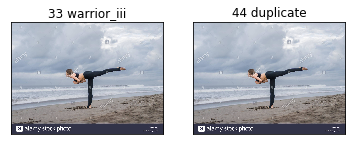

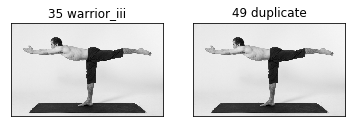

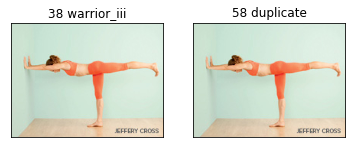

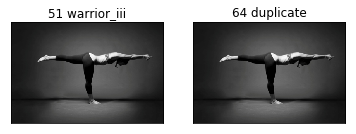

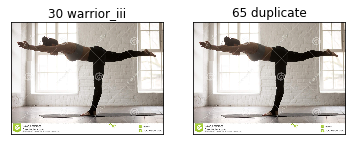

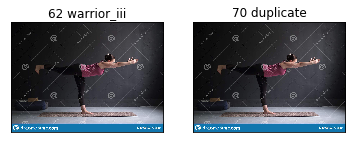

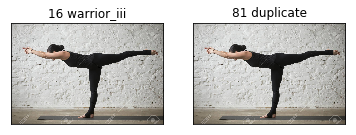

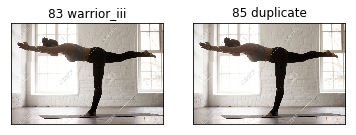

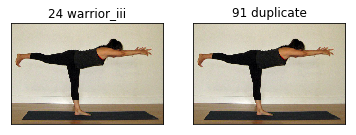

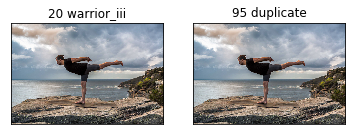

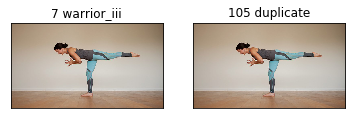

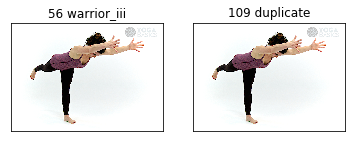

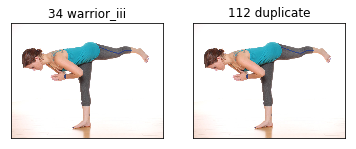

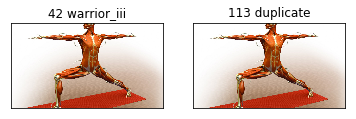

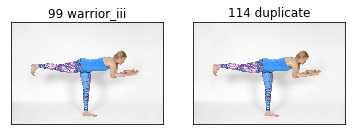

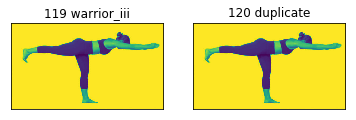

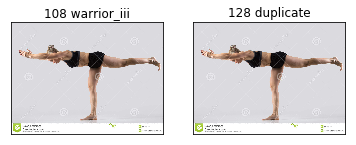

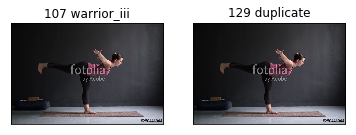

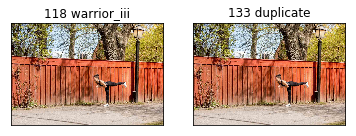

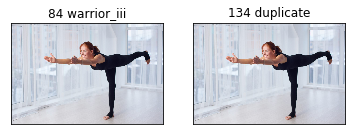

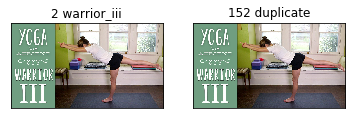

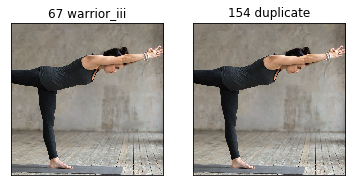

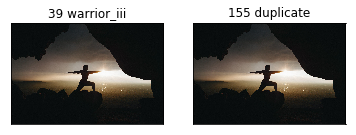

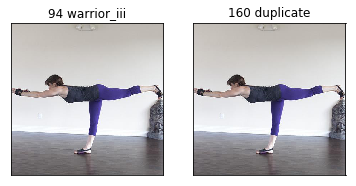

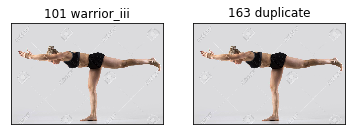

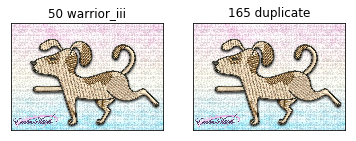

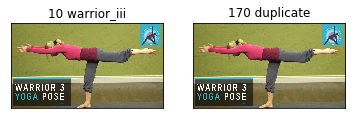

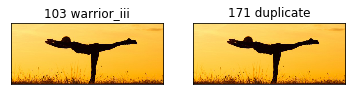

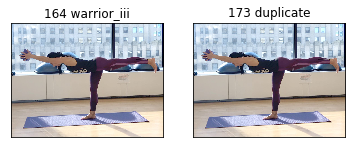

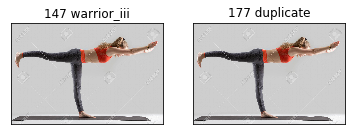

In [30]:
for file_indexes in duplicates[:30]:
# for file_indexes in [dupe for dupe in duplicates if dupe[1]==25]:
    try:
    
        plt.subplot(121),plt.imshow(imread(file_list[file_indexes[1]]))
        plt.title(str(file_indexes[1])+' '+str(file_indexes[2])), plt.xticks([]), plt.yticks([])

        plt.subplot(122),plt.imshow(imread(file_list[file_indexes[0]]))
        plt.title(str(file_indexes[0]) + ' duplicate'), plt.xticks([]), plt.yticks([])
        plt.show()
    
    except OSError as e:
        continue

In [31]:
for index, _, pose in duplicates:
    del_path = os.path.join(file_list[index])
    os.remove(del_path)
#     os.remove()

In [34]:
print(check_for_duplicates('.'))

([], {})


In [1]:
import os

In [3]:
for root, dirs, files in os.walk('../images/incoming_images/'):
    print(root, len(files))

../images/incoming_images/ 1
../images/incoming_images/warrior_iii 192
../images/incoming_images/warrior_ii 160
../images/incoming_images/crow 188
../images/incoming_images/downward_facing_dog 187
../images/incoming_images/supported_shoulder_stand 95


# Summary
I have run into this problem a lot. There is just not much freely accessible images for this project. After removing duplicates and corrupted files, I am left with less than a few hundred images in each class.

This will be a proof of concept, and we will move forward.